In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_images, train_labels = loadlocal_mnist(
    images_path='C:/Users/ASUS/ATS/UTS VISION/letters/emnist-letters-train-images-idx3-ubyte',
    labels_path='C:/Users/ASUS/ATS/UTS VISION/letters/emnist-letters-train-labels-idx1-ubyte')

print(train_images.shape, train_labels.shape)


(124800, 784) (124800,)


# Dataset Preparation

In [3]:
import numpy as np

np.random.seed(42)
images_balanced = []
labels_balanced = []

for label in range(1, 27):
    idx = np.where(train_labels == label)[0]
    sampled = np.random.choice(idx, 100, replace=False)
    images_balanced.append(train_images[sampled])
    labels_balanced.append(train_labels[sampled])

images_balanced = np.vstack(images_balanced)
labels_balanced = np.hstack(labels_balanced)

images_balanced.shape, labels_balanced.shape


((2600, 784), (2600,))

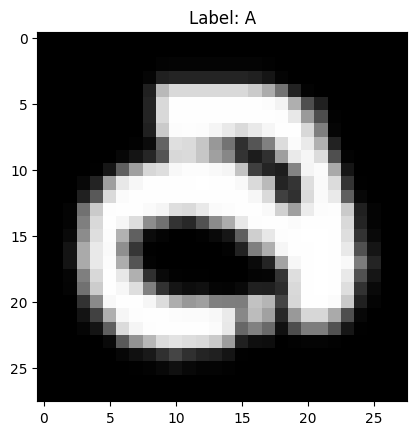

In [4]:
plt.imshow(images_balanced[0].reshape(28, 28).T, cmap='gray')
plt.title(f"Label: {chr(labels_balanced[0] + 64)}")

plt.show()


In [5]:
unique, counts = np.unique(train_labels, return_counts=True)
labels_as_letters = [chr(label + 64) for label in unique]
unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

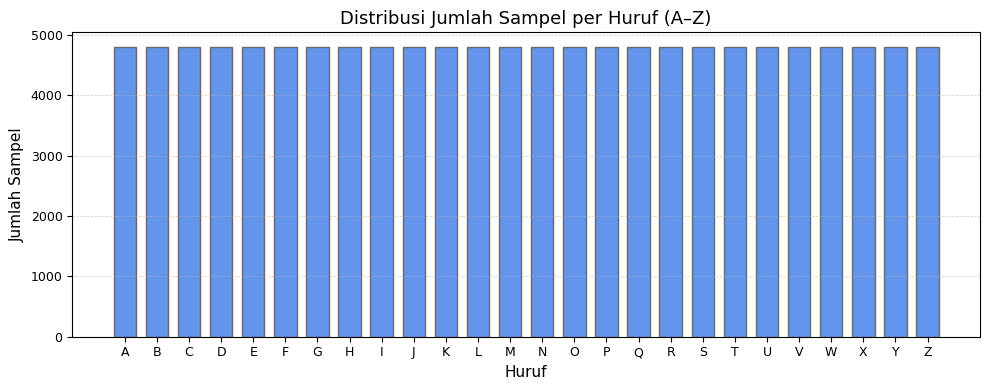

In [6]:
plt.figure(figsize=(10, 4))
plt.bar(labels_as_letters, counts, color='#6495ED', edgecolor='dimgray', width=0.7)
plt.title("Distribusi Jumlah Sampel per Huruf (A–Z)", fontsize=13)
plt.xlabel("Huruf", fontsize=11)
plt.ylabel("Jumlah Sampel", fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


In [7]:
shuffle_idx = np.random.permutation(len(train_labels))
shuffled_images = train_images[shuffle_idx]
shuffled_labels = train_labels[shuffle_idx]


In [8]:
feature, hog_image = hog(train_images[0].reshape(28,28), orientations=6, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')

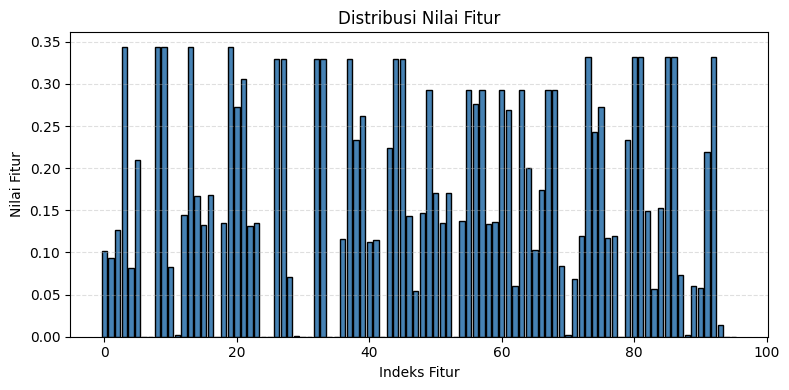

(96,)

In [9]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(feature)), feature, color='steelblue', edgecolor='black')
plt.xlabel("Indeks Fitur")
plt.ylabel("Nilai Fitur")
plt.title("Distribusi Nilai Fitur")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

feature.shape


In [10]:
# Define the number of features based on the shape of feature
n_dims = feature.shape[0]
n_dims


96

In [11]:
# Get the number of samples from train_images
n_samples = train_images.shape[0]
n_samples


124800

In [12]:
#Create Variable Train for dataset
X_train, y_train = datasets.make_classification(n_samples, n_dims)
X_train.shape, y_train.shape

((124800, 96), (124800,))

# Feature Extraction

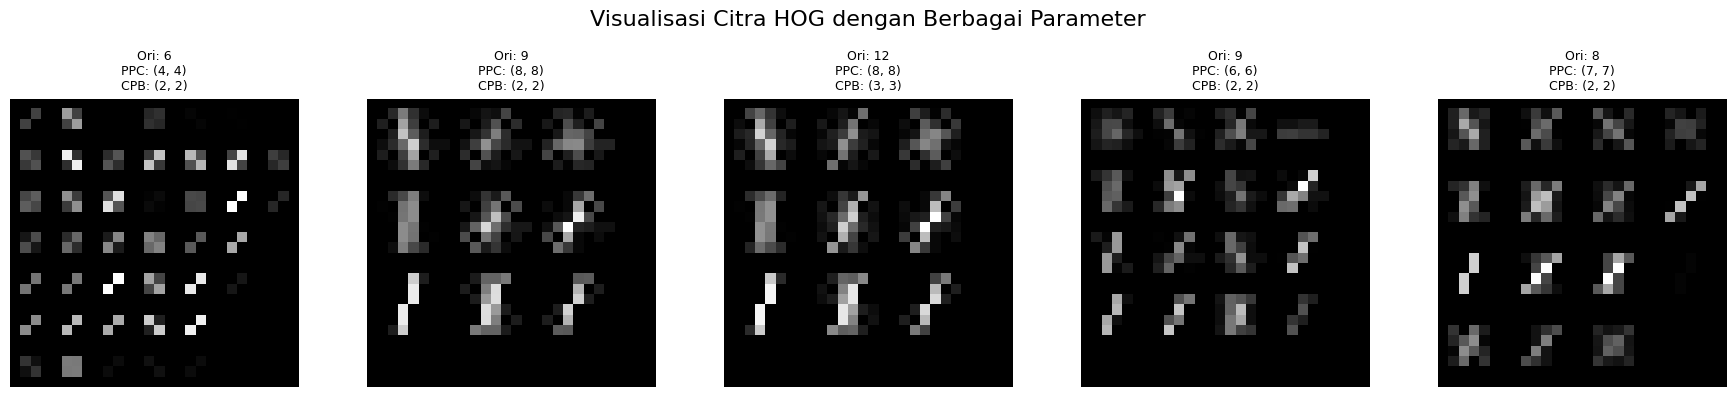

In [13]:
from skimage.feature import hog
import matplotlib.pyplot as plt

# Ambil satu gambar dan ubah jadi 28x28 (transpose karena EMNIST format kolom)
image = train_images[0].reshape(28, 28).T

# Daftar parameter HOG
param_list = [
    {"orientations": 6, "pixels_per_cell": (4, 4), "cells_per_block": (2, 2)},
    {"orientations": 9, "pixels_per_cell": (8, 8), "cells_per_block": (2, 2)},
    {"orientations": 12, "pixels_per_cell": (8, 8), "cells_per_block": (3, 3)},
    {"orientations": 9, "pixels_per_cell": (6, 6), "cells_per_block": (2, 2)},
    {"orientations": 8, "pixels_per_cell": (7, 7), "cells_per_block": (2, 2)},
]

plt.figure(figsize=(18, 4))

for idx, params in enumerate(param_list):
    features, hog_img = hog(
        image,
        visualize=True,
        block_norm='L2-Hys',
        **params
    )
    
    plt.subplot(1, len(param_list), idx + 1)
    plt.imshow(hog_img, cmap='gray')
    plt.title(
        f"Ori: {params['orientations']}\n"
        f"PPC: {params['pixels_per_cell']}\n"
        f"CPB: {params['cells_per_block']}",
        fontsize=9
    )
    plt.axis('off')

plt.suptitle("Visualisasi Citra HOG dengan Berbagai Parameter", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


In [14]:
#For HogFeature train
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28, 28),orientations=6, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42,shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((99840, 96), (99840,), (24960, 96), (24960,))

# Implement Support Vector Machine

In [16]:
from sklearn.svm import SVC
clf = SVC()


# Use GridSearchCV to find best parameter for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report,confusion_matrix
import pandas as pd


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

param_grid = {
    'C': [0.1,1,3.2, 5.0, 2.4, 10.0],
    'kernel': ['rbf', 'linear'],
    'gamma': ["scale", "auto"]
}
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=5, refit='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


cv_results = pd.DataFrame(grid_search.cv_results_)
cv_metrics = cv_results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
print("\n=== Hasil Evaluasi Training (Cross-Validation) ===")
print(cv_metrics.sort_values(by='mean_test_f1', ascending=False))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
best_model = grid_search.best_estimator_
print("\nParameter Terbaik")
print(grid_search.best_params_)


=== Parameter Terbaik ===
{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


# Use Leave-One-Out-Cross-Validation Evaluation

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_predict
loo = LeaveOneOut()
y_pred_loocv = cross_val_predict(best_model, X_train, y_train, cv=loo)
accuracy = accuracy_score(y_train, y_pred_loocv)
print("LOOCV Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision_score(y_train, y_pred_loocv, average='weighted') * 100))
print("Recall: {:.2f}%".format(recall_score(y_train, y_pred_loocv, average='weighted')))
print("F1 Score: {:.2f}%".format(f1_score(y_train, y_pred_loocv, average='weighted')))

cof_LOOCV = confusion_matrix(y_train, y_pred_loocv)

LOOCV Accuracy: 79.38%
Precision: 79.58%
Recall: 0.79%
F1 Score: 0.79%


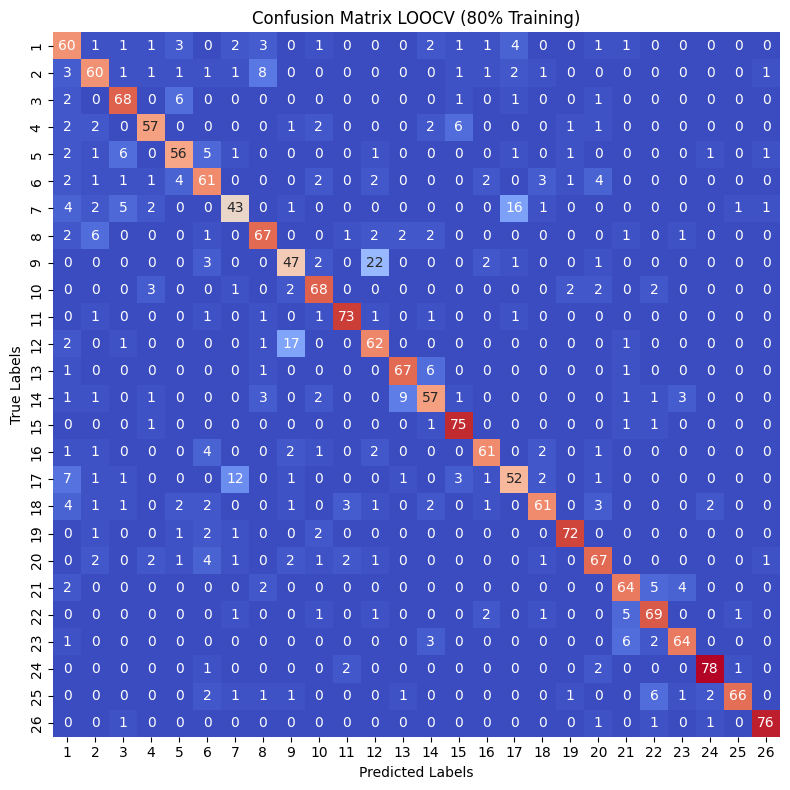

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
sns.heatmap(cof_LOOCV, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train),
            cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix LOOCV (80% Training)')
plt.tight_layout()
plt.show()


# Use 20% from dataset to Evaluation

In [ ]:
pred_test = best_model.predict(X_test) 
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, pred_test) * 100))
print("Test Precision: {:.2f}".format(precision_score(y_test, pred_test, average='macro')))
print("Test Recall: {:.2f}".format(recall_score(y_test, pred_test, average='weighted')))
print("Test F1 Score: {:.2f}".format(f1_score(y_test, pred_test, average='weighted')))
conf_mat = confusion_matrix(y_test, pred_test)


Test Accuracy: 78.27%
Test Precision: 0.79
Test Recall: 0.78
Test F1 Score: 0.78


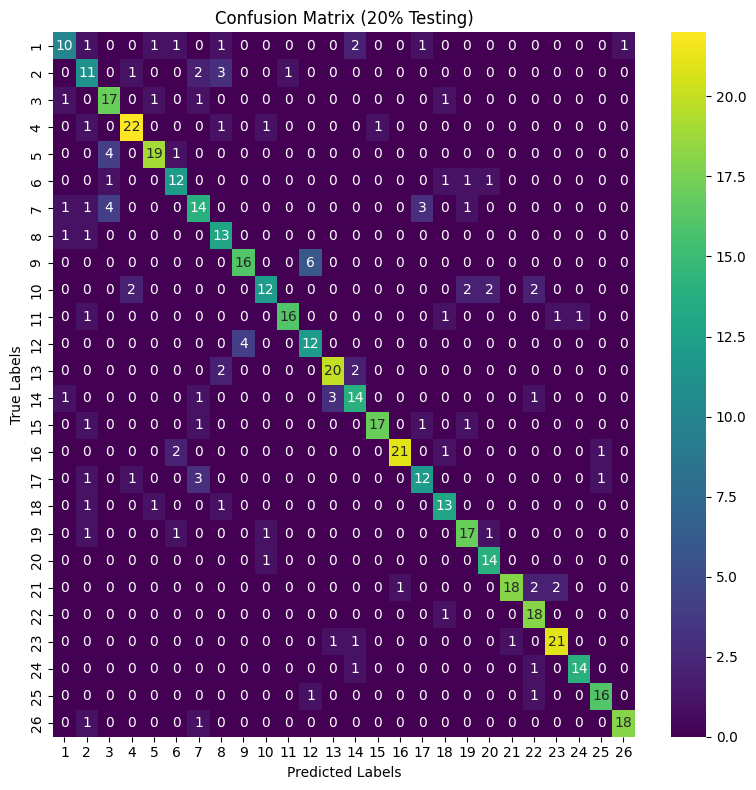

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train),
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (20% Testing)')
plt.tight_layout()
plt.show()


# Testing Model

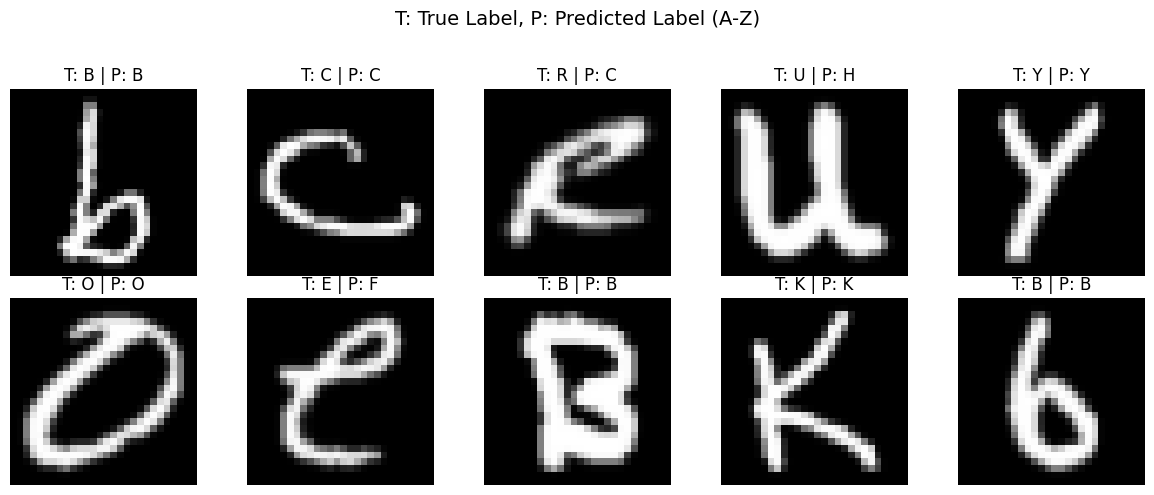

In [ ]:
import matplotlib.pyplot as plt
import random

# Pilih 10 indeks acak dari data training
indices = random.sample(range(len(X_train)), 10)

plt.figure(figsize=(12, 5))

for i, idx in enumerate(indices):
    img = balanced_train_images[idx].reshape(28, 28).T
    true_label = y_train[idx]
    pred_label = y_pred_loocv[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T: {chr(true_label + 64)} | P: {chr(pred_label + 64)}")
    plt.axis('off')

plt.suptitle("T: True Label, P: Predicted Label (A-Z)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


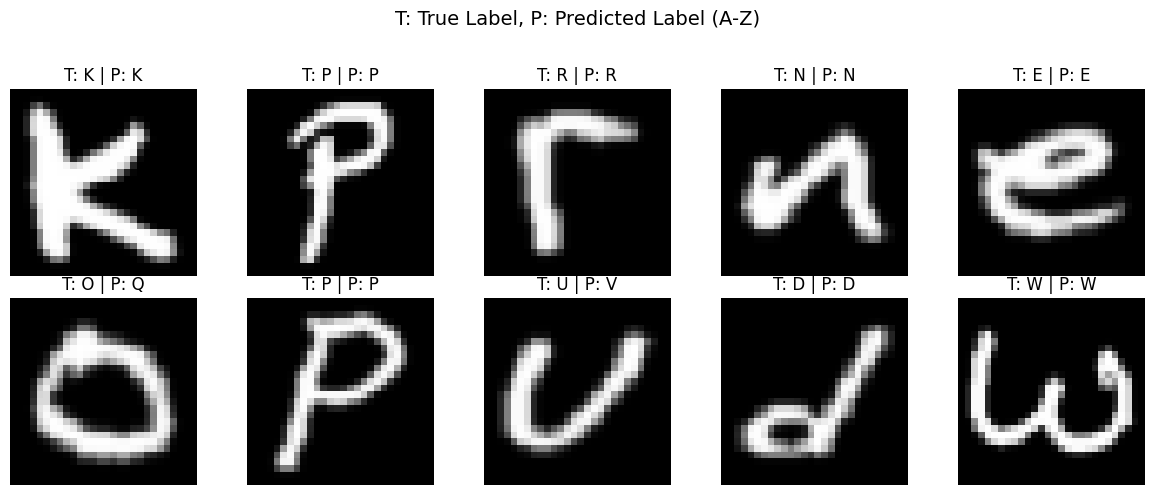

In [ ]:
import matplotlib.pyplot as plt
import random

# Pilih 10 indeks acak dari data testing
indices = random.sample(range(len(X_test)), 10)

plt.figure(figsize=(12, 5))

for i, idx in enumerate(indices):
    img = balanced_train_images[idx + 2080].reshape(28, 28).T  # Offset 2080 untuk data test di balanced_train_images
    true_label = y_test[idx]
    pred_label = pred_test[idx]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T: {chr(true_label + 64)} | P: {chr(pred_label + 64)}")
    plt.axis('off')

plt.suptitle("T: True Label, P: Predicted Label (A-Z)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
